# Random Forest implementation and use 70:30 split data

In [1]:
from trees import decisionTree, randomForest
from utils import import_data, K_fold_split, normal_split, transform_pd, transform_question


import pandas as pd

filepath = 'datasets/tennis.csv'

data = import_data(filepath)

# dt = decisionTree('classification', 'gini', data, 0, 100)
# tree = dt.train()
# dt.construct_tree(tree, "")

filepath_2 = 'datasets/iris.csv'
iris_data = import_data(filepath_2)



train, validate, test = normal_split(iris_data, 0.7)
train_data, validate_data, test_data = transform_pd(train, iris_data), transform_pd(validate, iris_data), transform_pd(test, iris_data)
train_validate = transform_pd(train+validate, iris_data)
rf = randomForest('classification', 'gini', train_validate, 20)

forest = rf.train()
rf.construct_forest()

count = 0.0
for row in test:
    count += (rf.predict_f(list(iris_data.iloc[row, :-1])) == iris_data.iloc[row, -1])
print count/len(test)

forest successfully built
### Tree No  1  ######
 
 
Is petal_length >= 4.9?
--> True:
('  Predict', {'virginica': 8})
--> False:
('  Predict', {'not-virginica': 44})
 
 
### Tree No  2  ######
 
 
Is petal_length >= 4.9?
--> True:
('  Predict', {'virginica': 8})
--> False:
('  Predict', {'not-virginica': 44})
 
 
### Tree No  3  ######
 
 
Is sepal_length >= 6.4?
--> True:
  Is sepal_width >= 2.8?
  --> True:
('    Predict', {'not-virginica': 5, 'virginica': 1})
  --> False:
('    Predict', {'virginica': 2})
--> False:
('  Predict', {'not-virginica': 41, 'virginica': 3})
 
 
### Tree No  4  ######
 
 
('Predict', {'not-virginica': 52})
 
 
### Tree No  5  ######
 
 
Is petal_width >= 1.6?
--> True:
  Is sepal_width >= 2.8?
  --> True:
('    Predict', {'not-virginica': 6, 'virginica': 1})
  --> False:
('    Predict', {'virginica': 2})
--> False:
('  Predict', {'not-virginica': 43})
 
 
### Tree No  6  ######
 
 
Is petal_width >= 1.9?
--> True:
('  Predict', {'virginica': 8})
--> False

# Random Forest use on K-Fold Cross validation Data

In [2]:
n_folds = 5
K_fold_data = K_fold_split(iris_data, n_folds)
for i in xrange(n_folds):
    test = K_fold_data[i]
    train = []
    for j in xrange(n_folds):
        if i != j:
            train.extend(K_fold_data[j])
    train_data = transform_pd(train, iris_data)
    rf = randomForest('classification', 'gini', train_validate, 5)
    forest = rf.train()
    count = 0.0
    for row in test:
        count += (rf.predict_f(list(iris_data.iloc[row, :-1])) == iris_data.iloc[row, -1])
    print count/len(test)

forest successfully built
0.866666666667
forest successfully built
1.0
forest successfully built
0.9
forest successfully built
0.966666666667
forest successfully built
0.933333333333


# Parrallel VS Serial Random Forest

In [3]:
import time
rf = randomForest('classification', 'gini', train_validate, 10)

start = time.time()
forest = rf.train_serial()
end = time.time()

print end-start #serial process

forest successfully built
4.39641499519


In [18]:
start = time.time()
forest = rf.train()
end = time.time()

print end-start #parallel process

forest successfully built
3.46253800392


# Random Function



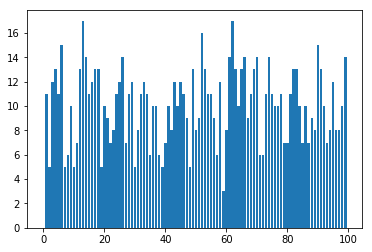

In [13]:
import time


class Random(object):
    def __init__(self, seed=0):
        self.seed = seed
        self.start_no = 0xabfeeed

    def generate_seed(self):
        g = time.time()
        return int((g - int(g))*10000000000)
    
    def random(self):
        if self.seed == 0:
            self.seed = self.generate_seed()
        random_number = self.seed & 0xfffffffffff
        random_number ^= ( random_number >> 25 )
        random_number ^= ( random_number << 13 )
        random_number *= 0x2545 * 0.00000000001
        return random_number - int(random_number)
        
    def randint(self, start, end):
        if self.seed == 0:
            self.seed = self.generate_seed()
        random_number = self.seed & 0xfffffffffff
        random_number ^= ( random_number >> 25 )
        random_number ^= ( random_number << 13 )
        random_number *= self.generate_seed() * 0.00000000001
        random_number = random_number - int(random_number)
        random_number =  int(random_number*100000)
        random_number = (random_number % (end-start)) + start
        return random_number


import matplotlib.pyplot as plt



k = Random()
x = range(100)
y = list()
for j in xrange(100):
    y.append(0)
numbers = []
for i in xrange(1000):
    l = k.randint(1, 100)
    numbers.append(l)
    y[l] += 1

plt.bar(x, y)
plt.show()

# Y = MX + C data generated and noise added

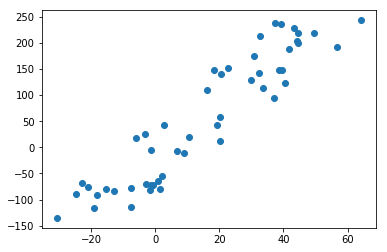

In [6]:
import numpy as np

m = 5
c = 40

solutions = np.ones((50, 2))
for i in xrange(50):
    x = k.randint(-40, 40)
    y = m*x + c
    solutions[i, 0] = x
    solutions[i, 1] = y
solutions_noisy = solutions + (np.random.rand(50, 2)*30)


plt.scatter(solutions_noisy[:, 0], solutions_noisy[:, 1])
plt.show()

# Polynomial fit (5)

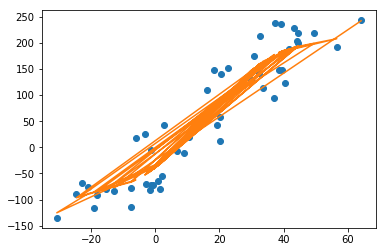

In [7]:
x = solutions_noisy[:, 0]
y = solutions_noisy[:, 1]



p = np.poly1d(np.polyfit(x, y, 5))
plt.plot(x, y, 'o', x, p(x), '-')
plt.show()

# Average polynomail fit

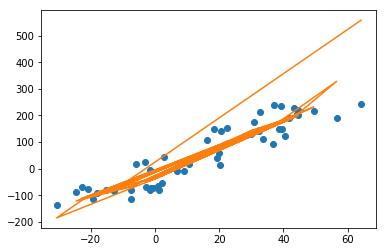

In [8]:
polynomials = list()

for i in xrange(100):
    t = list()
    for j in xrange(20):
        t.append(k.randint(0, 49))
    x_t = solutions_noisy[t, 0]
    y_t = solutions_noisy[t, 1]
    p = np.poly1d(np.polyfit(x_t, y_t, 5))
    polynomials.append(p)
#     plt.plot(x, y, 'o', x, p(x), '-')
#     plt.show()
    
    
p_mean = sum(polynomials)/100
plt.plot(x, y, 'o', x, p_mean(x), '-')
plt.show()
    

# Kaggle Competition


In [9]:
kaggle_test = 'datasets/kaggle_bulldozer/Train.csv'
from sklearn import tree, preprocessing


kaggle_test_data = import_data(kaggle_test)

kaggle_test_data = kaggle_test_data.drop(['SalesID', 'MachineID', 'ModelID','auctioneerID','saledate','fiProductClassDesc','fiBaseModel','fiModelSeries','fiModelDesc','fiModelDescriptor'], axis=1)

headers = list(kaggle_test_data)



kaggle_X_data = kaggle_test_data.fillna(0)
kaggle_Y_data = kaggle_X_data['SalePrice']
kaggle_X_data = kaggle_X_data.drop(['SalePrice'], axis=1)
kaggle_X_data = pd.get_dummies(kaggle_X_data)

clf = tree.DecisionTreeClassifier()
print kaggle_X_data.as_matrix()
clf = clf.fit(kaggle_X_data.as_matrix(), kaggle_Y_data.as_matrix())


/Users/jayakrishnasahit/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2818: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/jayakrishnasahit/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


[[ 121. 2004.   68. ...    0.    0.    0.]
 [ 121. 1996. 4640. ...    0.    0.    0.]
 [ 121. 2001. 2838. ...    0.    0.    0.]
 ...
 [ 149. 2005.    0. ...    0.    0.    0.]
 [ 149. 2005.    0. ...    0.    0.    0.]
 [ 149. 2005.    0. ...    0.    0.    0.]]


/Users/jayakrishnasahit/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [10]:
test_path = 'datasets/kaggle_bulldozer/Test.csv'

test = import_data(test_path)


test = test.drop(['SalesID', 'MachineID', 'ModelID','auctioneerID','saledate','fiProductClassDesc','fiBaseModel','fiModelSeries','fiModelDesc','fiModelDescriptor'], axis=1)




test_data = test.fillna(0)
test_data = pd.get_dummies(test_data)

gg =  kaggle_X_data.shape[1] - test_data.shape[1] 

l = np.zeros((test_data.shape[0], gg))
test_data = np.append(test_data, l, axis=1)

print kaggle_X_data.shape[1] - test_data.shape[1]
predictions = clf.predict(test_data)


test = import_data(test_path)

# print test['SalesID'][2]

f = list()
for i in xrange(predictions.shape[0]):
    d = {
        'SalesID': test['SalesID'][i],
        'SalePrice': predictions[i]
    }
    f.append(d)
    
df = pd.DataFrame(f)
df.to_csv('Results.csv', index=False)

0


# ADA Boost without noise

In [11]:
from trees import ADABoost

ab = ADABoost('classification', 'gini', iris_data, 8)
ab.train()

Is petal_width >= 1.8?
--> True:
('  Predict', {'not-virginica': 1, 'virginica': 45})
--> False:
('  Predict', {'not-virginica': 99, 'virginica': 5})
Is petal_length >= 4.8?
--> True:
('  Predict', {'not-virginica': 6, 'virginica': 49})
--> False:
('  Predict', {'not-virginica': 94, 'virginica': 1})
Is sepal_length >= 6.2?
--> True:
('  Predict', {'not-virginica': 16, 'virginica': 39})
--> False:
('  Predict', {'not-virginica': 84, 'virginica': 11})
Is sepal_width >= 3.4?
--> True:
('  Predict', {'not-virginica': 31, 'virginica': 5})
--> False:
('  Predict', {'not-virginica': 69, 'virginica': 45})
('Predict', {'not-virginica': 100, 'virginica': 50})
('Predict', {'not-virginica': 100, 'virginica': 50})
('Predict', {'not-virginica': 100, 'virginica': 50})
('Predict', {'not-virginica': 100, 'virginica': 50})
[3.178053830347948, 1.489293600592035, 0.3687967776914219, -0.30467300822657034, -5.7731597280508306e-15, 0.0, 0.0, 0.0]
ADABoost done successfully


# ADABoost - with noise added

In [12]:
train, validate, test = normal_split(iris_data, 0.7)

count = 0 
for row in test:
    count += (ab.predict_adaboost(list(iris_data.iloc[row, :-1])) == iris_data.iloc[row, -1])
print count/len(test)

1


Is petal_width >= 1.7?
--> True:
('  Predict', {'not-virginica': 9, 'virginica': 46})
--> False:
('  Predict', {'not-virginica': 91, 'virginica': 4})
Is petal_length >= 4.8?
--> True:
('  Predict', {'not-virginica': 15, 'virginica': 49})
--> False:
('  Predict', {'not-virginica': 85, 'virginica': 1})
Is sepal_length >= 6.3?
--> True:
('  Predict', {'not-virginica': 19, 'virginica': 37})
--> False:
('  Predict', {'not-virginica': 81, 'virginica': 13})
Is sepal_width >= 3.4?
--> True:
('  Predict', {'not-virginica': 33, 'virginica': 5})
--> False:
('  Predict', {'not-virginica': 67, 'virginica': 45})
('Predict', {'not-virginica': 100, 'virginica': 50})
('Predict', {'not-virginica': 100, 'virginica': 50})
('Predict', {'not-virginica': 100, 'virginica': 50})
('Predict', {'not-virginica': 100, 'virginica': 50})






[2.355031568366591, 0.5249251523749128, -0.18058494955851478, 1.0135142107681097, -8.881784197001256e-16, -4.440892098500627e-16, 2.2204460492503128e-16, -4.440892098500627e-16]
